## Reuters machine learning project
### from the book *Deep Learning with Python* by *Francois Chollet*

## In this project
we will be classifiying data from Reuters Newswire into 46 mutually exclusive categories

In [34]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)


8982
8982


## vectorize the data.
just like in the binary classification example, we need to one-hot encode our data.

In [37]:
import numpy as np
def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [55]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [56]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [57]:
x_val = x_train[:1_000]
partial_x_train = x_train[1_000:]
y_val = one_hot_train_labels[:1_000]
partial_y_train = one_hot_train_labels[1_000:]

In [58]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 17ms/step - loss: 2.7582 - accuracy: 0.4852 - val_loss: 1.8720 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 0s 10ms/step - loss: 1.5479 - accuracy: 0.6730 - val_loss: 1.3957 - val_accuracy: 0.6790
Epoch 3/9
16/16 [==============================] - 0s 10ms/step - loss: 1.1810 - accuracy: 0.7347 - val_loss: 1.2149 - val_accuracy: 0.7260
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.9702 - accuracy: 0.7884 - val_loss: 1.0884 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8047 - accuracy: 0.8289 - val_loss: 1.0097 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 10ms/step - loss: 0.6739 - accuracy: 0.8566 - val_loss: 0.9576 - val_accuracy: 0.7930
Epoch 7/9
16/16 [==============================] - 0s 9ms/step - loss: 0.5636 - accuracy: 0.8784 - val_loss: 0.9245 - val_accuracy: 0.8060
Epoch 8/9
16/16 [====

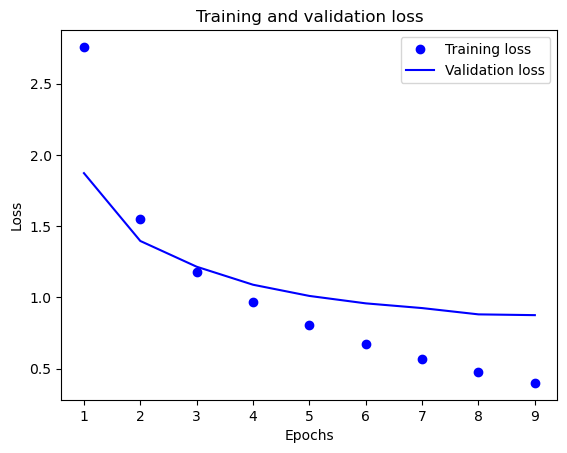

In [59]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [60]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9488 - accuracy: 0.7814


In [61]:
results

[0.9487946033477783, 0.7813891172409058]

In [62]:
ans = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [69]:
ans
for i,pred in enumerate(ans):
    m = 0
    i_m = 0
    for j,each in enumerate(pred):
        if each > m:
            m = each
            i_m = j
    print(i_m, m)
    print(test_labels)

3 0.8993331
[ 3 10  1 ...  3  3 24]
10 0.97614706
[ 3 10  1 ...  3  3 24]
1 0.749448
[ 3 10  1 ...  3  3 24]
4 0.8440611
[ 3 10  1 ...  3  3 24]
13 0.8861207
[ 3 10  1 ...  3  3 24]
3 0.9722867
[ 3 10  1 ...  3  3 24]
3 0.9633975
[ 3 10  1 ...  3  3 24]
3 0.99481547
[ 3 10  1 ...  3  3 24]
3 0.99823534
[ 3 10  1 ...  3  3 24]
3 0.9137541
[ 3 10  1 ...  3  3 24]
1 0.70330954
[ 3 10  1 ...  3  3 24]
4 0.982074
[ 3 10  1 ...  3  3 24]
1 0.97913367
[ 3 10  1 ...  3  3 24]
3 0.9672846
[ 3 10  1 ...  3  3 24]
1 0.6396078
[ 3 10  1 ...  3  3 24]
11 0.9718637
[ 3 10  1 ...  3  3 24]
4 0.35064033
[ 3 10  1 ...  3  3 24]
3 0.9892215
[ 3 10  1 ...  3  3 24]
19 0.96826553
[ 3 10  1 ...  3  3 24]
3 0.996742
[ 3 10  1 ...  3  3 24]
8 0.6661124
[ 3 10  1 ...  3  3 24]
3 0.90802246
[ 3 10  1 ...  3  3 24]
3 0.9680134
[ 3 10  1 ...  3  3 24]
3 0.61833096
[ 3 10  1 ...  3  3 24]
9 0.7785759
[ 3 10  1 ...  3  3 24]
3 0.9847459
[ 3 10  1 ...  3  3 24]
4 0.99930555
[ 3 10  1 ...  3  3 24]
6 0.79603976
[ 3 